In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_excel('./竞赛发布数据/表2-患者影像信息血肿及水肿的体积及位置.xlsx', engine='openpyxl')
df.rename(columns={'首次检查流水号': '随访0流水号'}, inplace=True)
df.rename(columns={'ED_volume': 'ED_volume0'}, inplace=True)

In [3]:
# 用于存储重塑后的数据
new_data = []

# 循环遍历每一行数据
for _, row in df.iterrows():
    ID = row['ID']
#     print(ID)
    base_values = [ID]
#     print(base_values)
    # 循环处理'随访{n}流水号'和'ED_volume{n}'列，直到找不到列为止
    i = 0
    while True:
        visit_col = f'随访{i}流水号'
        volume_col = f'ED_volume{i}'
        
        # 检查是否存在该列
        if visit_col not in row or volume_col not in row:
            break
        
        visit_value = row[visit_col]
        volume_value = row[volume_col]
        
        # 检查是否有流水号，如果有则添加一行数据
        if not pd.isnull(visit_value):
            new_row = base_values + [visit_value, volume_value]
            new_data.append(new_row)
        
        i += 1


In [4]:
new_df = pd.DataFrame(new_data, columns=['ID', '流水号', 'ED_volume'])
# new_df["ID"] = new_df["ID"].astype(int)
new_df = new_df[(new_df["ID"] >= "sub001") & (new_df["ID"] <= "sub100")]
# 打印结果
new_df

,ID,流水号,ED_volume
0,sub001,2.016121e+13,48919.0
1,sub001,2.016121e+13,57898.0
2,sub001,2.016122e+13,81747.0
3,sub001,2.016122e+13,107793.0
4,sub001,2.016123e+13,126558.0
...,...,...,...
445,sub099,2.018062e+13,19517.0
446,sub099,2.018062e+13,30933.0
447,sub100,2.018031e+13,7367.0
448,sub100,2.018032e+13,6033.0


In [5]:
df2 = pd.read_excel('./竞赛发布数据/附表1-检索表格-流水号vs时间.xlsx', engine='openpyxl')
df2.rename(columns={'入院首次检查时间点': '随访0时间点'}, inplace=True)
df2.rename(columns={'入院首次检查流水号': '随访0流水号'}, inplace=True)


In [6]:
# 用于存储重塑后的数据
new_data2 = []

# 循环遍历每一行数据
for _, row in df2.iterrows():
    ID = row['ID']
#     print(ID)
    base_values = [ID]
#     print(base_values)
    # 循环处理'随访{n}流水号'和'ED_volume{n}'列，直到找不到列为止
    i = 0
    while True:
        visit_col = f'随访{i}流水号'
        time_col = f'随访{i}时间点'
        
        # 检查是否存在该列
        if visit_col not in row or time_col not in row:
            break
        
        visit_value = row[visit_col]
        time_value = row[time_col]
        
        # 检查是否有流水号，如果有则添加一行数据
        if not pd.isnull(visit_value):
            new_row2 = base_values + [visit_value, time_value]
            new_data2.append(new_row2)
        
        i += 1
        

In [7]:
# 创建新的DataFrame
new_df2 = pd.DataFrame(new_data2, columns=['ID', '流水号', '时间'])
new_df2 = new_df2[(new_df2["ID"] >= "sub001") & (new_df2["ID"] <= "sub100")]
# 设置浮点数格式化，显示为整数形式
# pd.options.display.float_format = '{:.0f}'.format
# 打印结果
new_df2

,ID,流水号,时间
0,sub001,2.016121e+13,2016-12-12 23:32:54
1,sub001,2.016121e+13,2016-12-13 05:19:00
2,sub001,2.016122e+13,2016-12-18 09:09:24
3,sub001,2.016122e+13,2016-12-23 16:47:09
4,sub001,2.016123e+13,2016-12-30 14:35:12
...,...,...,...
449,sub099,2.018062e+13,2018-06-21 09:43:31
450,sub099,2.018062e+13,2018-06-22 10:34:55
451,sub100,2.018031e+13,2018-03-14 04:46:39
452,sub100,2.018032e+13,2018-03-15 15:00:31


In [8]:
merged_df = new_df.merge(new_df2, on=['ID', '流水号'], how='inner')
merged_df

,ID,流水号,ED_volume,时间
0,sub001,2.016121e+13,48919.0,2016-12-12 23:32:54
1,sub001,2.016121e+13,57898.0,2016-12-13 05:19:00
2,sub001,2.016122e+13,81747.0,2016-12-18 09:09:24
3,sub001,2.016122e+13,107793.0,2016-12-23 16:47:09
4,sub001,2.016123e+13,126558.0,2016-12-30 14:35:12
...,...,...,...,...
445,sub099,2.018062e+13,19517.0,2018-06-21 09:43:31
446,sub099,2.018062e+13,30933.0,2018-06-22 10:34:55
447,sub100,2.018031e+13,7367.0,2018-03-14 04:46:39
448,sub100,2.018032e+13,6033.0,2018-03-15 15:00:31


In [9]:
# 将时间列转换为 datetime 格式
merged_df['时间'] = pd.to_datetime(merged_df['时间'])

# 计算每个 ID 对应的最小时间
merged_df['最小时间'] = merged_df.groupby('ID')['时间'].transform('min')

# 计算时间差值（单位：小时）
merged_df['时间差'] = ((merged_df['时间'] - merged_df['最小时间']).dt.total_seconds() / 3600).round(2)
merged_df

,ID,流水号,ED_volume,时间,最小时间,时间差
0,sub001,2.016121e+13,48919.0,2016-12-12 23:32:54,2016-12-12 23:32:54,0.00
1,sub001,2.016121e+13,57898.0,2016-12-13 05:19:00,2016-12-12 23:32:54,5.77
2,sub001,2.016122e+13,81747.0,2016-12-18 09:09:24,2016-12-12 23:32:54,129.61
3,sub001,2.016122e+13,107793.0,2016-12-23 16:47:09,2016-12-12 23:32:54,257.24
4,sub001,2.016123e+13,126558.0,2016-12-30 14:35:12,2016-12-12 23:32:54,423.04
...,...,...,...,...,...,...
445,sub099,2.018062e+13,19517.0,2018-06-21 09:43:31,2018-06-20 19:03:09,14.67
446,sub099,2.018062e+13,30933.0,2018-06-22 10:34:55,2018-06-20 19:03:09,39.53
447,sub100,2.018031e+13,7367.0,2018-03-14 04:46:39,2018-03-14 04:46:39,0.00
448,sub100,2.018032e+13,6033.0,2018-03-15 15:00:31,2018-03-14 04:46:39,34.23


In [10]:
df_temp = pd.read_excel('./竞赛发布数据/表1-患者列表及临床信息.xlsx', engine='openpyxl')
df_temp = df_temp[['ID',"发病到首次影像检查时间间隔"]]
df_temp

,ID,发病到首次影像检查时间间隔
0,sub001,2.5
1,sub002,3.0
2,sub003,2.0
3,sub004,1.0
4,sub005,5.0
...,...,...
155,sub156,5.5
156,sub157,0.5
157,sub158,2.8
158,sub159,3.0


In [11]:
# 使用 merge 函数根据 ID 列合并两个 DataFrame
merged_df2 = pd.merge(merged_df, df_temp, on='ID')
merged_df2['间隔和'] = merged_df2['时间差'] + merged_df2['发病到首次影像检查时间间隔']
merged_df2

,ID,流水号,ED_volume,时间,最小时间,时间差,发病到首次影像检查时间间隔,间隔和
0,sub001,2.016121e+13,48919.0,2016-12-12 23:32:54,2016-12-12 23:32:54,0.00,2.5,2.50
1,sub001,2.016121e+13,57898.0,2016-12-13 05:19:00,2016-12-12 23:32:54,5.77,2.5,8.27
2,sub001,2.016122e+13,81747.0,2016-12-18 09:09:24,2016-12-12 23:32:54,129.61,2.5,132.11
3,sub001,2.016122e+13,107793.0,2016-12-23 16:47:09,2016-12-12 23:32:54,257.24,2.5,259.74
4,sub001,2.016123e+13,126558.0,2016-12-30 14:35:12,2016-12-12 23:32:54,423.04,2.5,425.54
...,...,...,...,...,...,...,...,...
445,sub099,2.018062e+13,19517.0,2018-06-21 09:43:31,2018-06-20 19:03:09,14.67,3.0,17.67
446,sub099,2.018062e+13,30933.0,2018-06-22 10:34:55,2018-06-20 19:03:09,39.53,3.0,42.53
447,sub100,2.018031e+13,7367.0,2018-03-14 04:46:39,2018-03-14 04:46:39,0.00,0.5,0.50
448,sub100,2.018032e+13,6033.0,2018-03-15 15:00:31,2018-03-14 04:46:39,34.23,0.5,34.73


In [12]:
# 找到时间差为0的行
baseline_rows = merged_df2[merged_df2['时间差'] == 0]

# 创建一个字典，将每个ID的基准值映射到时间差为0的行
baseline_dict = dict(zip(baseline_rows['ID'], baseline_rows['ED_volume']))

# 计算其他行的百分比变化
merged_df2['百分比变化'] = merged_df2.apply(lambda row: (row['ED_volume'] / baseline_dict[row['ID']]) * 100, axis=1)
merged_df2

,ID,流水号,ED_volume,时间,最小时间,时间差,发病到首次影像检查时间间隔,间隔和,百分比变化
0,sub001,2.016121e+13,48919.0,2016-12-12 23:32:54,2016-12-12 23:32:54,0.00,2.5,2.50,100.000000
1,sub001,2.016121e+13,57898.0,2016-12-13 05:19:00,2016-12-12 23:32:54,5.77,2.5,8.27,118.354831
2,sub001,2.016122e+13,81747.0,2016-12-18 09:09:24,2016-12-12 23:32:54,129.61,2.5,132.11,167.106850
3,sub001,2.016122e+13,107793.0,2016-12-23 16:47:09,2016-12-12 23:32:54,257.24,2.5,259.74,220.349966
4,sub001,2.016123e+13,126558.0,2016-12-30 14:35:12,2016-12-12 23:32:54,423.04,2.5,425.54,258.709295
...,...,...,...,...,...,...,...,...,...
445,sub099,2.018062e+13,19517.0,2018-06-21 09:43:31,2018-06-20 19:03:09,14.67,3.0,17.67,202.185849
446,sub099,2.018062e+13,30933.0,2018-06-22 10:34:55,2018-06-20 19:03:09,39.53,3.0,42.53,320.449601
447,sub100,2.018031e+13,7367.0,2018-03-14 04:46:39,2018-03-14 04:46:39,0.00,0.5,0.50,100.000000
448,sub100,2.018032e+13,6033.0,2018-03-15 15:00:31,2018-03-14 04:46:39,34.23,0.5,34.73,81.892222


In [13]:
temp = merged_df2[['ID','ED_volume','间隔和']]
temp

,ID,ED_volume,间隔和
0,sub001,48919.0,2.50
1,sub001,57898.0,8.27
2,sub001,81747.0,132.11
3,sub001,107793.0,259.74
4,sub001,126558.0,425.54
...,...,...,...
445,sub099,19517.0,17.67
446,sub099,30933.0,42.53
447,sub100,7367.0,0.50
448,sub100,6033.0,34.73


In [14]:
temp.describe()

,ED_volume,间隔和
count,450.000000,450.000000
mean,26561.000000,250.548067
std,26094.971249,550.349974
min,0.000000,0.250000
25%,7329.500000,11.397500
50%,18989.000000,63.925000
75%,39613.750000,282.692500
max,168138.000000,4801.220000


In [15]:
# temp["间隔和"] = temp["间隔和"].astype(int)
temp = temp[temp['间隔和']<=100]
temp = temp[temp['ED_volume']<=45000]

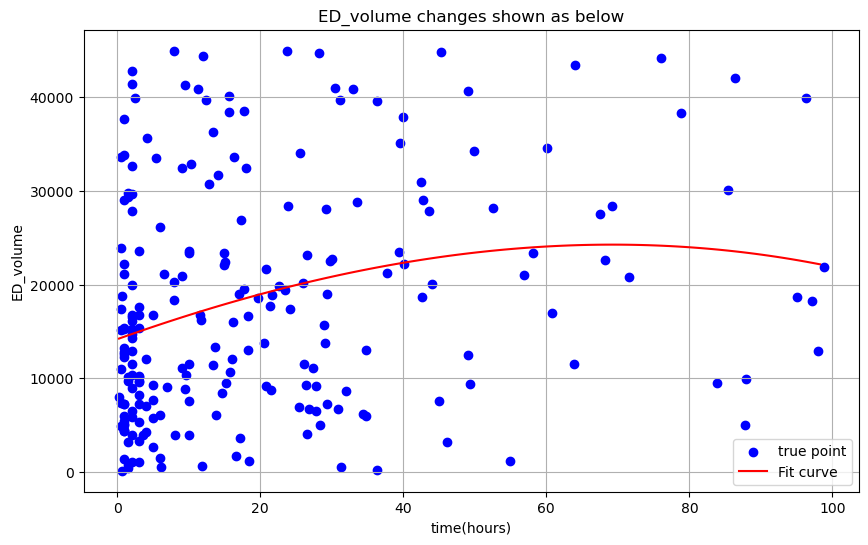

In [16]:
# 提取间隔和和ED_volume列
X = temp['间隔和'].values.reshape(-1, 1)
y = temp['ED_volume'].values

# 创建多项式特征
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# 使用线性回归模型拟合数据
model = LinearRegression()
model.fit(X_poly, y)

# 预测水肿体积
X_pred = np.arange(min(X), max(X), 1).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('ED_volume')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# 计算每个患者的真实值
real_values = temp['ED_volume'].values

# 使用模型预测每个患者的值
predicted_values = model.predict(X_poly)

# 计算残差
residuals = real_values - predicted_values

# 将残差添加到DataFrame中
temp['残差'] = residuals

# 打印DataFrame，包含真实值、预测值和残差
print(temp[['ID', 'ED_volume', '间隔和', '残差']])

         ID  ED_volume    间隔和            残差
5    sub002    23526.0   3.00   8551.711113
6    sub002    23390.0  14.92   5517.319524
7    sub002    28415.0  69.22   4167.451667
10   sub003    32621.0   2.00  17910.971130
11   sub003    41292.0   9.52  24673.787471
..      ...        ...    ...           ...
444  sub099     9653.0   3.00  -5321.288887
445  sub099    19517.0  17.67   1044.047154
446  sub099    30933.0  42.53   8304.465867
447  sub100     7367.0   0.50  -6940.726269
448  sub100     6033.0  34.73 -15548.482052

[223 rows x 4 columns]


In [18]:
# 计算每个ID的平均残差
average_residuals = temp.groupby('ID')['残差'].mean().reset_index()

# 打印DataFrame，包含每个ID的平均残差
print(average_residuals)

        ID            残差
0   sub002   6078.827435
1   sub003  21292.379300
2   sub004  -1935.481317
3   sub005  -3164.875081
4   sub007   5549.337070
..     ...           ...
92  sub096 -11161.844221
93  sub097  -8629.479735
94  sub098  15688.391639
95  sub099   1342.408044
96  sub100 -11244.604160

[97 rows x 2 columns]


In [19]:
average_residuals.to_excel('./output/output_q33b.xlsx', index= False, engine='openpyxl')

D:\0Code\new_Anaconda\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
D:\0Code\new_Anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
D:\0Code\new_Anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


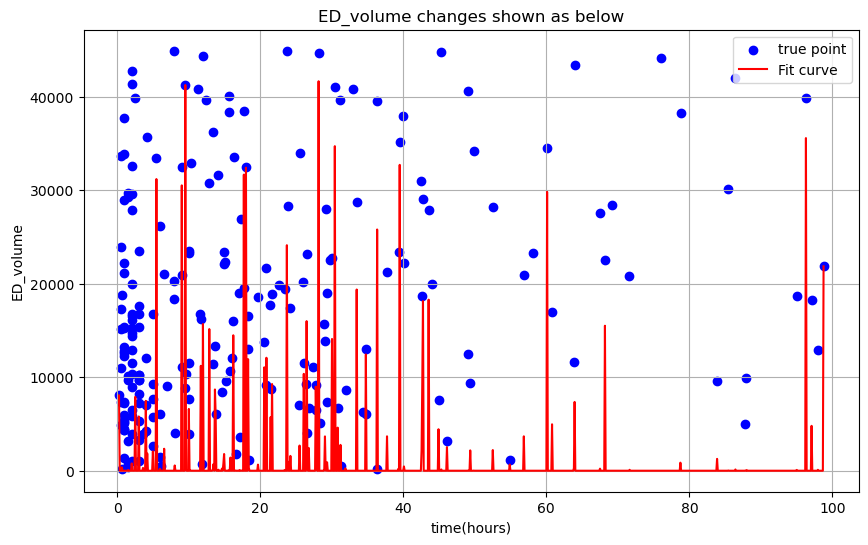

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


# 提取间隔和和ED_volume列
X = temp['间隔和'].values.reshape(-1, 1)
y = temp['ED_volume'].values

# 定义高斯过程回归模型
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 拟合模型
model.fit(X, y)

# 预测水肿体积
X_pred = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
y_pred, sigma = model.predict(X_pred, return_std=True)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('ED_volume')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
temp2 = merged_df2[['ID','百分比变化','间隔和']]
temp2

,ID,百分比变化,间隔和
0,sub001,100.000000,2.50
1,sub001,118.354831,8.27
2,sub001,167.106850,132.11
3,sub001,220.349966,259.74
4,sub001,258.709295,425.54
...,...,...,...
445,sub099,202.185849,17.67
446,sub099,320.449601,42.53
447,sub100,100.000000,0.50
448,sub100,81.892222,34.73


In [22]:
temp2.describe()

,百分比变化,间隔和
count,450.000000,450.000000
mean,247.112909,250.548067
std,492.085546,550.349974
min,0.000000,0.250000
25%,97.828327,11.397500
50%,107.191526,63.925000
75%,222.456327,282.692500
max,6622.089826,4801.220000


In [23]:
temp2 = temp2[temp2['间隔和']<=1200]
temp2 = temp2[temp2['百分比变化']<=2000]

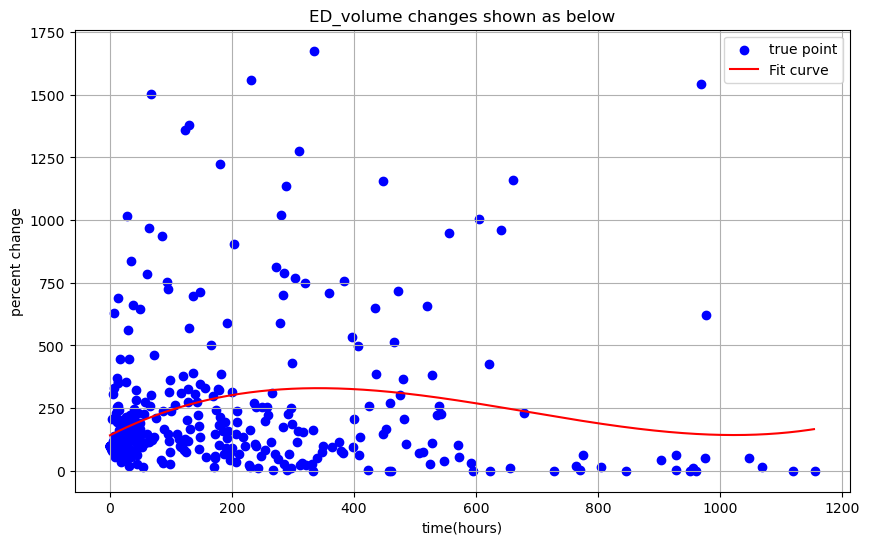

In [24]:
# 提取间隔和和ED_volume列
X = temp2['间隔和'].values.reshape(-1, 1)
y = temp2['百分比变化'].values

# 创建多项式特征
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# 使用线性回归模型拟合数据
model = LinearRegression()
model.fit(X_poly, y)

# 预测水肿体积
X_pred = np.arange(min(X), max(X), 1).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('percent change')
plt.legend()
plt.grid(True)
plt.show()

D:\0Code\new_Anaconda\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


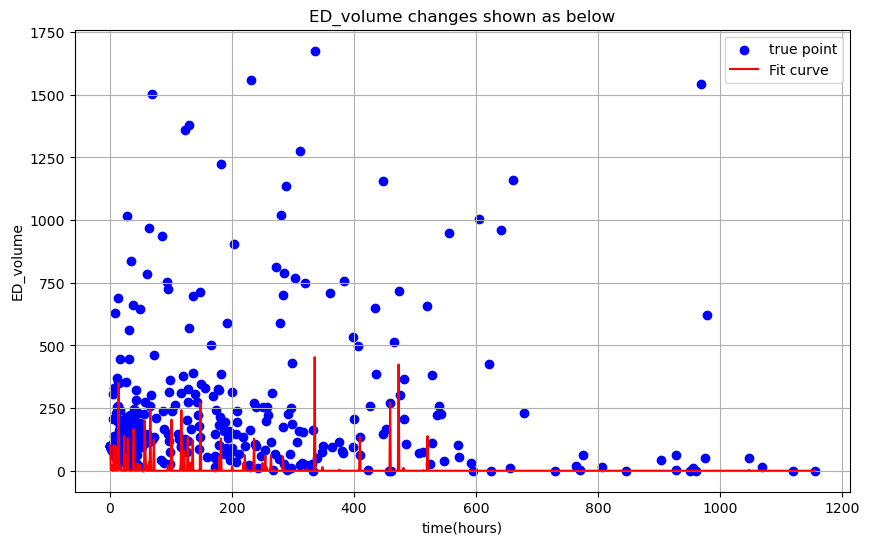

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


# 提取间隔和和ED_volume列
X = temp2['间隔和'].values.reshape(-1, 1)
y = temp2['百分比变化'].values

# 定义高斯过程回归模型
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 拟合模型
model.fit(X, y)

# 预测水肿体积
X_pred = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
y_pred, sigma = model.predict(X_pred, return_std=True)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('ED_volume')
plt.legend()
plt.grid(True)
plt.show()

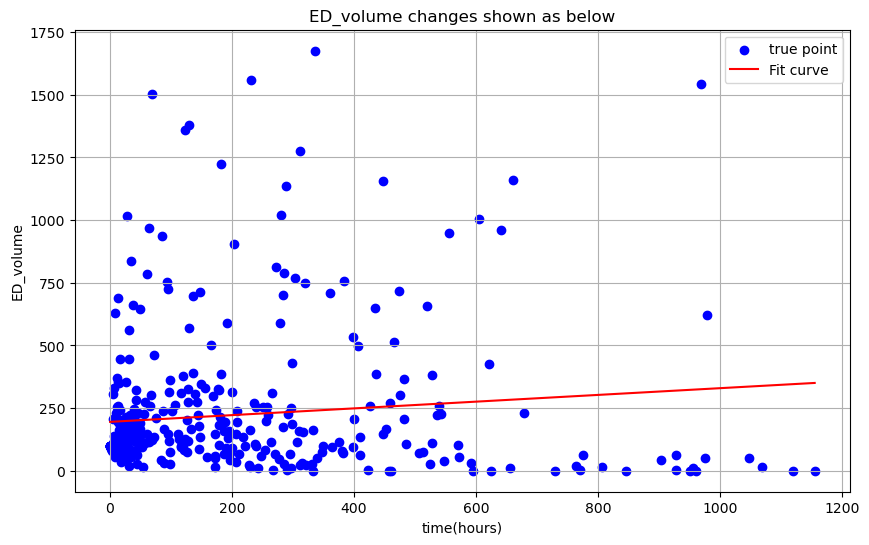

In [26]:
from sklearn.linear_model import Ridge

# 提取间隔和和百分比变化列
X = temp2['间隔和'].values.reshape(-1, 1)
y = temp2['百分比变化'].values

# 定义岭回归模型
model = Ridge(alpha=0.01)

# 拟合模型
model.fit(X, y)

# 预测百分比变化
X_pred = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
y_pred = model.predict(X_pred)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('ED_volume')
plt.legend()
plt.grid(True)
plt.show()


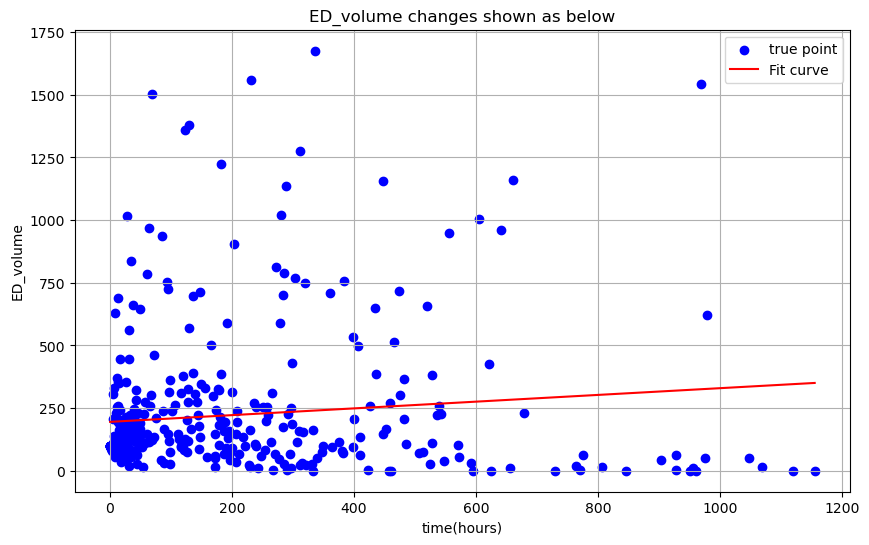

In [27]:
from sklearn.linear_model import Lasso

# 提取间隔和和ED_volume列
X = temp2['间隔和'].values.reshape(-1, 1)
y = temp2['百分比变化'].values

# 定义Lasso回归模型
alpha = 0.01  # 超参数，可以根据需要进行调整
model = Lasso(alpha=alpha)

# 拟合模型
model.fit(X, y)

# 预测水肿体积
X_pred = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
y_pred = model.predict(X_pred)

# 绘制拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='true point')
plt.plot(X_pred, y_pred, color='r', linestyle='-', label='Fit curve')
plt.title('ED_volume changes shown as below')
plt.xlabel('time(hours)')
plt.ylabel('ED_volume')
plt.legend()
plt.grid(True)
plt.show()
